In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

folder_dir = "./individual_stocks_5yr"
exclude_files = []

In [ ]:
def get_stocks(folder_dir):
    #stocks = np.zeros((476, 1259))
    stocks = np.zeros((470, 1259))
    prices = np.zeros((470, 1259))
    stock_names = []
    index = 0
    for file in os.listdir(folder_dir):
        if file in exclude_files:
            continue
        dir = os.path.join(folder_dir, file)
        df = pd.read_csv(dir)
        file_start_date = df['date'][df.index[0]]
        file_end_date = df['date'][df.index[-1]]
        
        if file_start_date == '2013-02-08' and file_end_date == '2018-02-07' and len(df) == 1259:
            #change = (df['close'] - df['open']) / df['open']
            change = df['close'] - df['open']
            change = np.array(change)
            change = np.where(change > 0, 1, np.where(change < 0, -1, 0))
            stocks[index] = change
            prices[index] = np.array(df['open'])
            stock_name = file.split('_')[0]
            stock_names.append(stock_name)
            index += 1
    return (stocks, stock_names, prices)                  

In [ ]:
(stocks, stock_names, prices) = get_stocks(folder_dir)
name_index = {}
for i in range(len(stock_names)):
    name_index[stock_names[i]] = i

In [ ]:
#Elbow method

#distortions = []
#for k in range(1, 100):
#    total = 0
#    for i in range(5):
#        model = KMeans(n_clusters=k)
#        model.fit(stocks)
#        total += model.inertia_
#    distortion = total / 5
#    distortions.append(total / 5)
# plt.xlabel("Number of Clusters")
# plt.ylabel("Distortion")
# plt.title("Elbow Method")
# plt.plot(range(1,101), distortions[:100], '.')
# plt.plot(range(1,101), distortions[:100])
# plt.show()

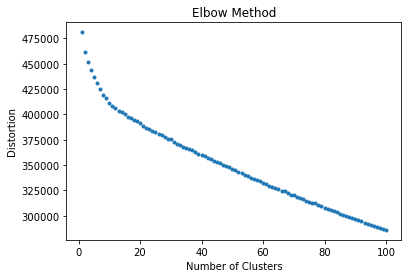

In [ ]:
model = KMeans(n_clusters = 10)
model.fit(stocks)
labels = model.predict(stocks)

In [ ]:
score = silhouette_score(stocks, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.03567617129794069


In [ ]:
clusters = {}
for i in range(len(labels)):
    stock_name = stock_names[i]
    cluster = labels[i]
    if cluster in clusters:
        clusters[cluster].append(stock_name)
    else:
        clusters[cluster] = [stock_name]
for cluster in sorted(clusters.keys()):
    print(str(cluster + 1) + ':', clusters[cluster])

1: ['AIV', 'AMT', 'ARE', 'AVB', 'BXP', 'DLR', 'DRE', 'EQR', 'ESS', 'EXR', 'FRT', 'GGP', 'HCN', 'HCP', 'KIM', 'MAA', 'MAC', 'PLD', 'PSA', 'REG', 'SLG', 'SPG', 'UDR', 'VNO', 'VTR']
2: ['AJG', 'ALL', 'AON', 'CBOE', 'CB', 'CINF', 'CME', 'MMC', 'NDAQ', 'PGR', 'RE', 'TRV', 'XL']
3: ['AAL', 'AAPL', 'ADM', 'AES', 'AMD', 'ANDV', 'AYI', 'BWA', 'CA', 'CBG', 'CBS', 'CF', 'CHRW', 'CMG', 'CSCO', 'CTL', 'DAL', 'DHI', 'DISCA', 'DISCK', 'DISH', 'DIS', 'FAST', 'FBHS', 'FCX', 'FFIV', 'F', 'GRMN', 'GT', 'HOG', 'HST', 'IBM', 'INTC', 'IP', 'JNPR', 'KMX', 'KORS', 'LEG', 'LEN', 'LKQ', 'MAS', 'MAT', 'MGM', 'MHK', 'MON', 'MOS', 'MPC', 'MU', 'MYL', 'NEM', 'NRG', 'NTAP', 'PHM', 'PVH', 'QCOM', 'RHI', 'RL', 'SIG', 'SNI', 'STX', 'SYMC', 'TIF', 'TPR', 'TWX', 'TXN', 'UAL', 'VIAB', 'VLO', 'WDC', 'WHR', 'WU', 'WYNN', 'WY', 'XRX']
4: ['BF.B', 'CAG', 'CCI', 'CHD', 'CLX', 'CL', 'CPB', 'DPS', 'EL', 'GIS', 'HRL', 'HSY', 'KMB', 'KO', 'K', 'MDLZ', 'MKC', 'MNST', 'MO', 'PAYX', 'PEP', 'PG', 'PM', 'SBAC', 'SJM', 'STZ', 'SYY', 'TA

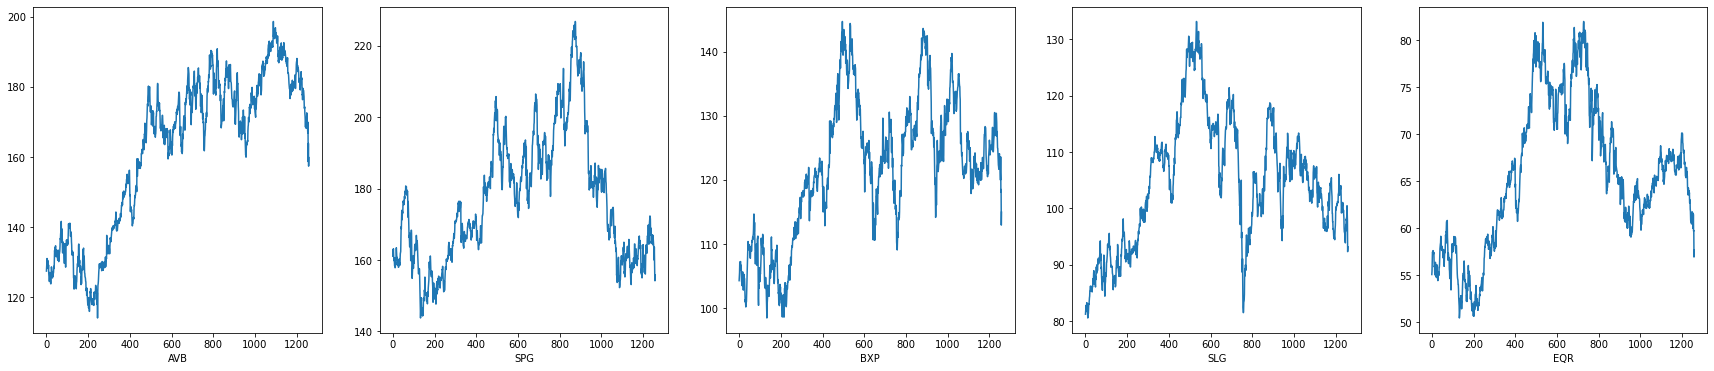

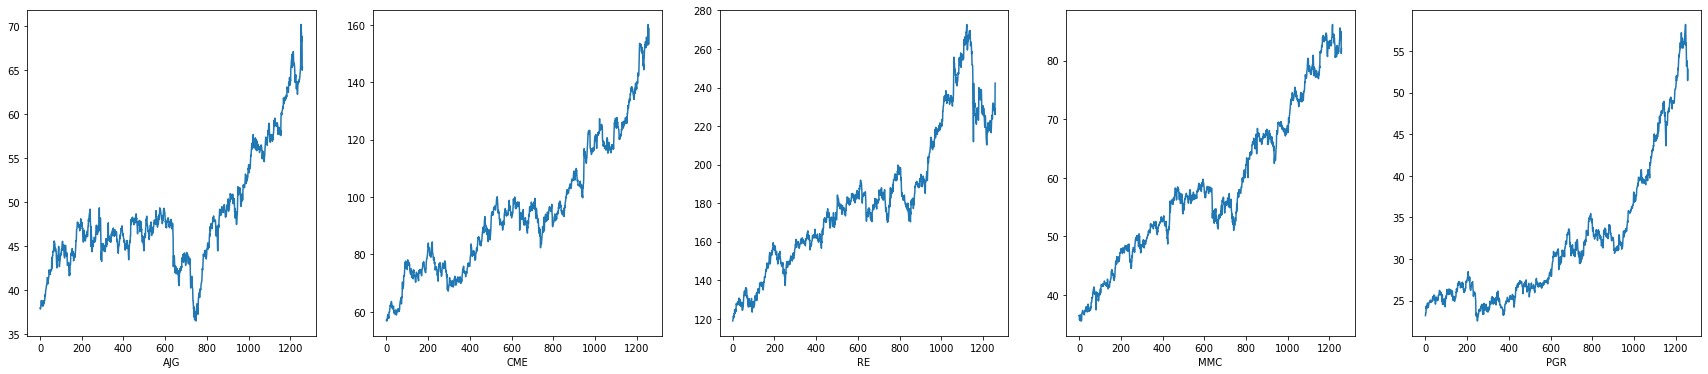

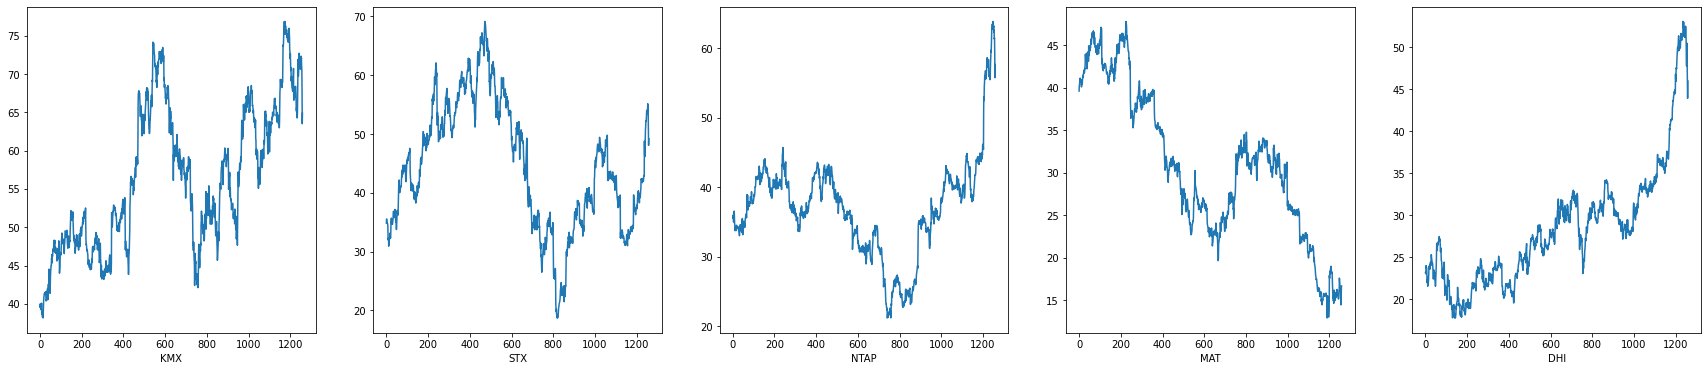

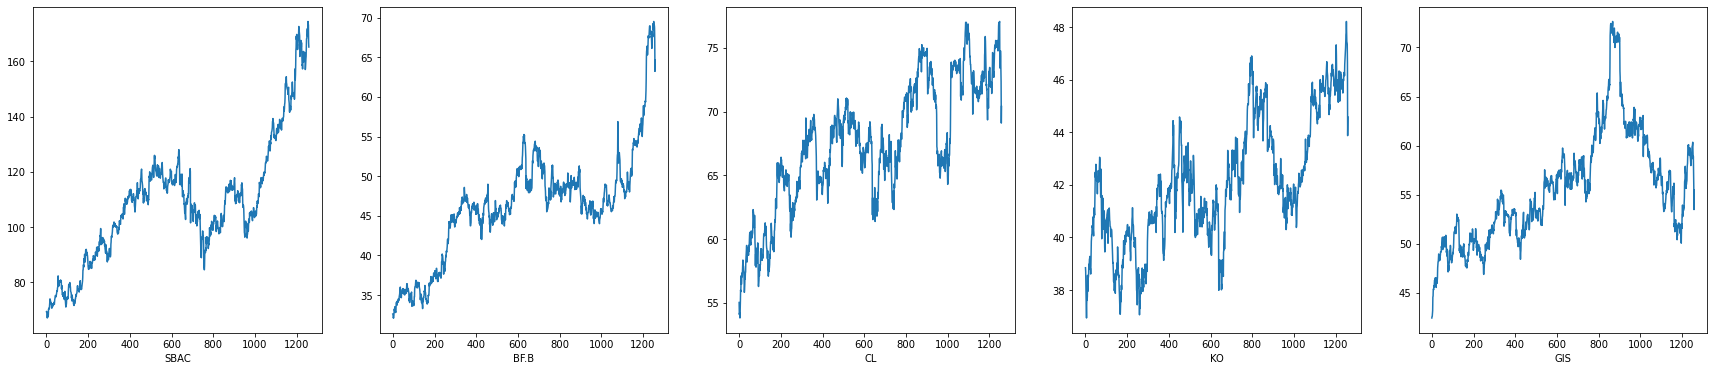

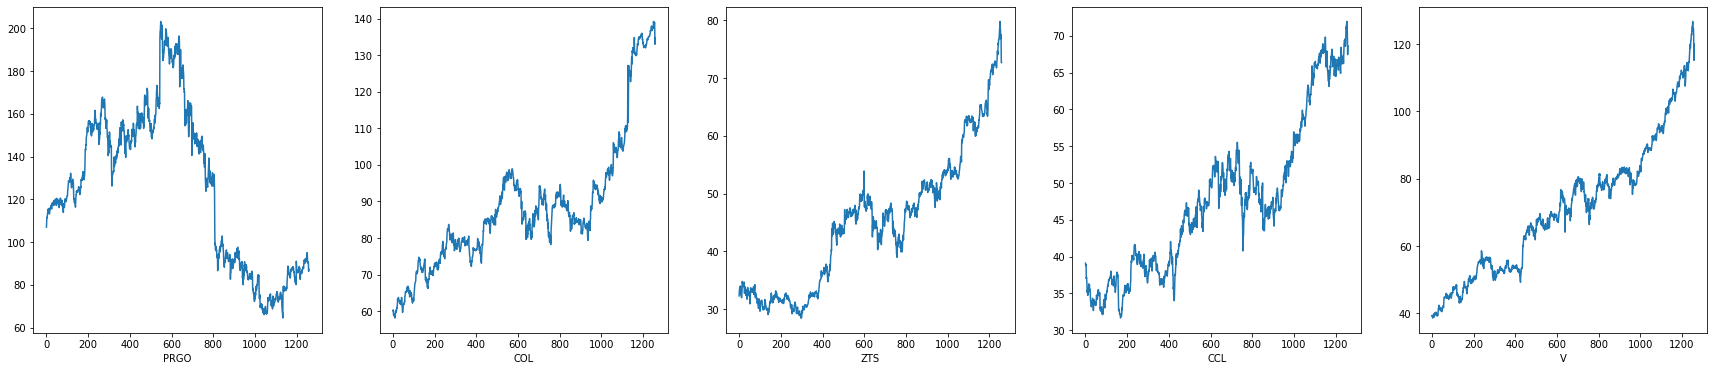

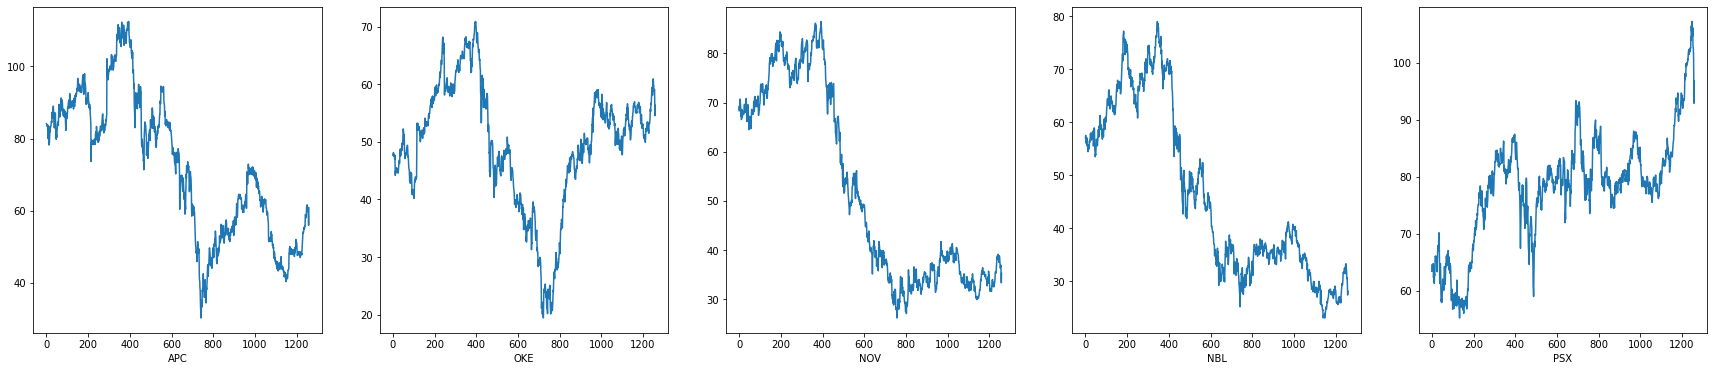

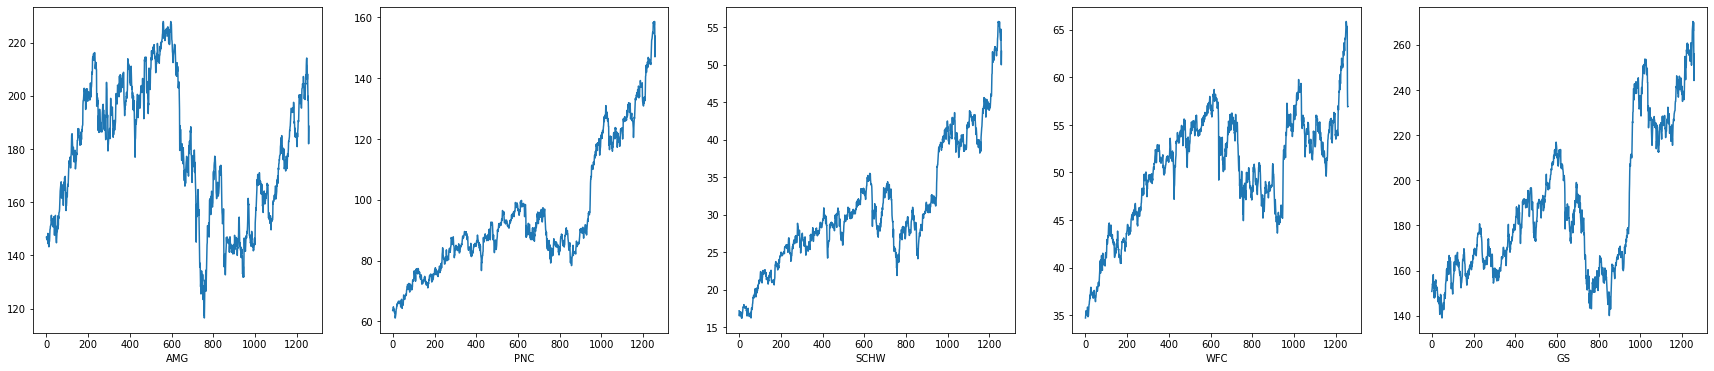

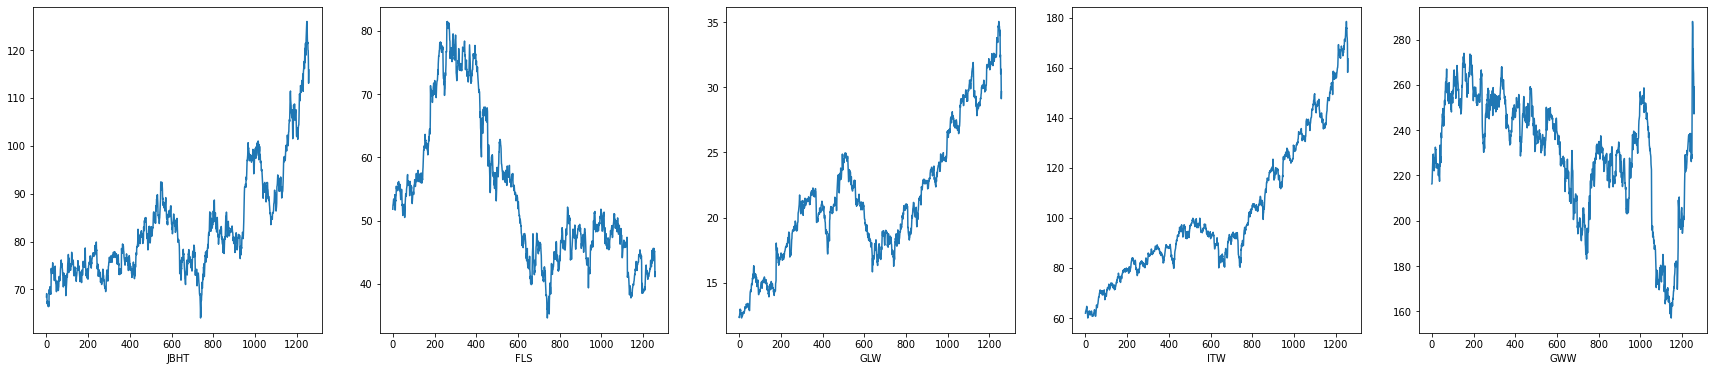

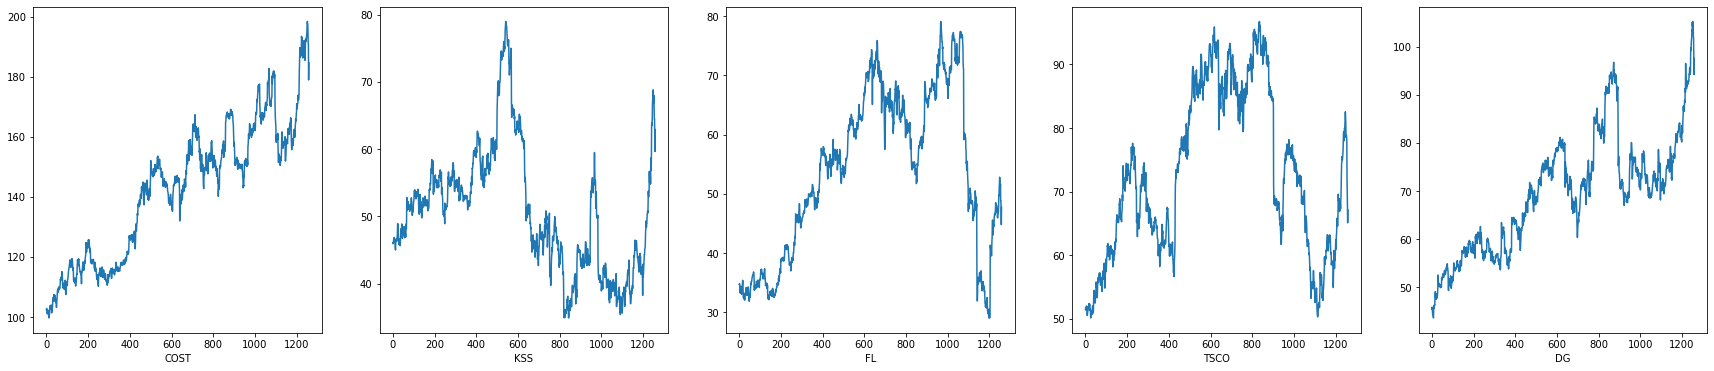

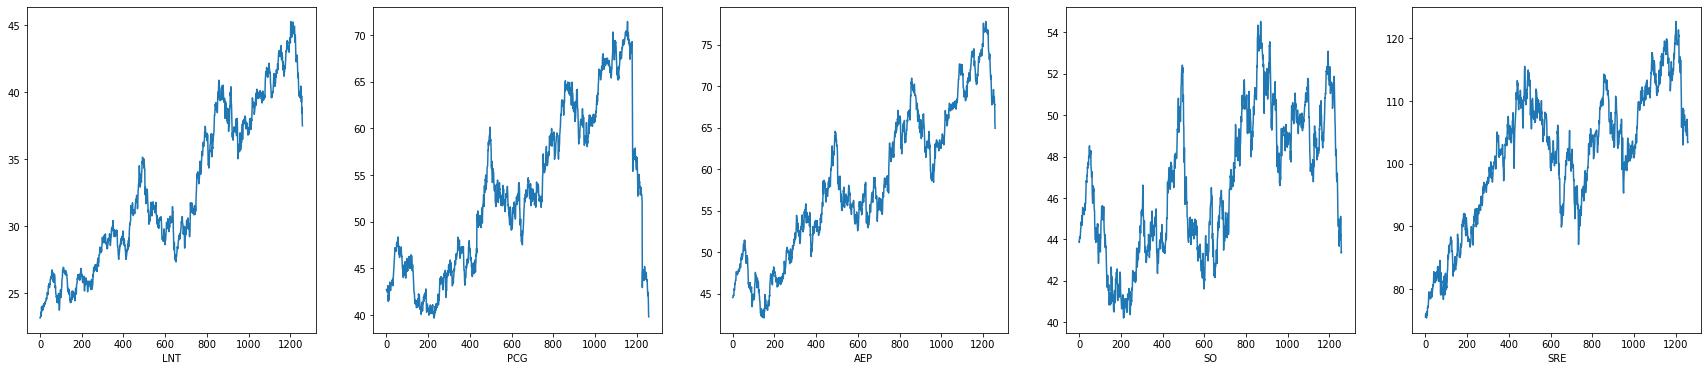

In [ ]:
from matplotlib.pyplot import figure
for cluster in sorted(clusters.keys()):
    num_stocks = 5
    random_stocks = np.random.choice(clusters[cluster], size=num_stocks, replace=False)
    figure(figsize=(30,6))
    for i in range(num_stocks):
        stock_name = random_stocks[i]
        stock_index = name_index[stock_name]
        stock_price = prices[stock_index]
        plt.subplot(1, num_stocks, i + 1)
        plt.xlabel(stock_name)
        plt.plot(stock_price)
    plt.show()